Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.ZN3BA5_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.ZN3BA5_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.0333 - loss: 3.6465 - val_accuracy: 0.0408 - val_loss: 3.5691
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.0689 - loss: 3.4496 - val_accuracy: 0.0856 - val_loss: 3.3891
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1751 - loss: 3.0251 - val_accuracy: 0.1304 - val_loss: 3.3592
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.3759 - loss: 2.2645 - val_accuracy: 0.1440 - val_loss: 3.4226
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6477 - loss: 1.2768 - val_accuracy: 0.1495 - val_loss: 4.2997
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.8589 - loss: 0.5465 - val_accuracy: 0.1454 - val_loss: 5.7352
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9519 - loss: 0.1917 - val_accuracy: 0.1440 - val_loss: 6.7578
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9715 - loss: 0.1080 - val_accuracy: 0.1630 - v

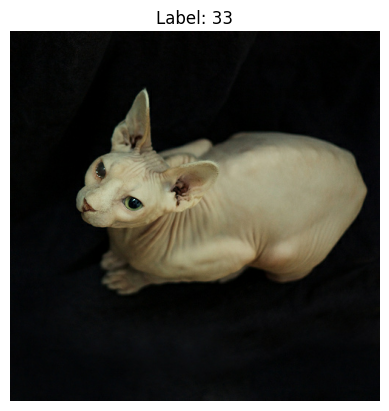

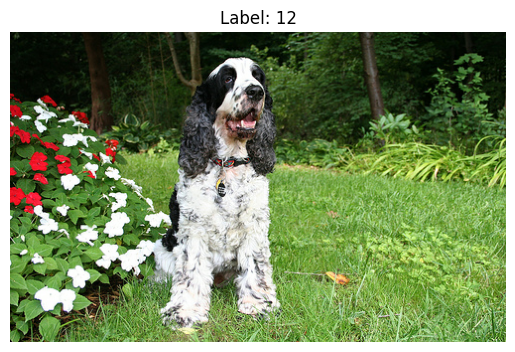

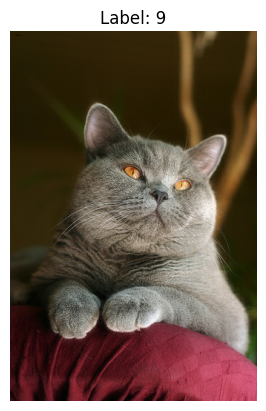

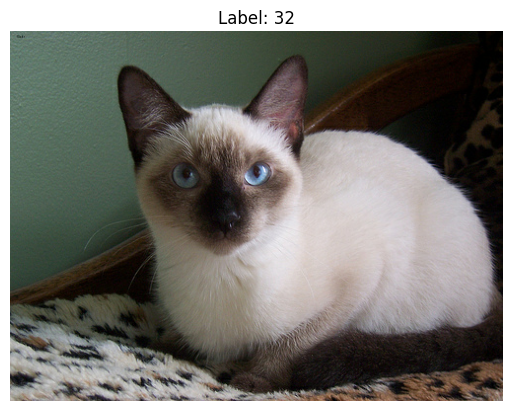

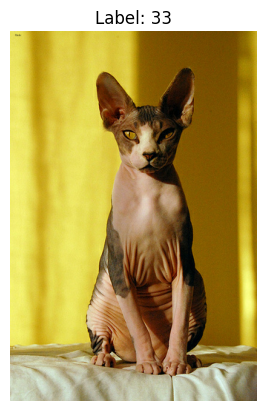

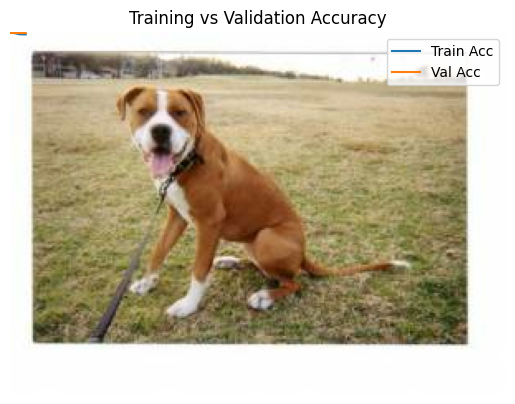

23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 447ms/step - accuracy: 0.1418 - loss: 9.1990

✅ Test Accuracy: 0.16


In [1]:
# Step 1: Install TensorFlow Datasets if needed
!pip install -q tensorflow-datasets

# Step 2: Import Libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Step 3: Load Oxford Pets Dataset
(ds_train, ds_test), ds_info = tfds.load(
    'oxford_iiit_pet',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# Step 4: Show Sample Images
def show_sample(ds):
    for image, label in ds.take(6):
        plt.figure()
        plt.imshow(image)
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')
show_sample(ds_train)

# Step 5: Data Preprocessing
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label

ds_train = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Step 6: Build a CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Step 7: Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Step 8: Train the Model
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# Step 9: Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# Step 10: Evaluate on Test Set
test_loss, test_acc = model.evaluate(ds_test)
print(f"\nTest Accuracy: {test_acc:.2f}")
